In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load datasets
churn_data = pd.read_csv("/content/churn_data.csv")
internet_data = pd.read_csv("/content/internet_data.csv")
customer_data = pd.read_csv("/content/customer_data.csv")

# Merge datasets
df = churn_data.merge(internet_data, on="customerID", how="left").merge(customer_data, on="customerID", how="left")
df.drop(columns=['customerID'], inplace=True)

df.head()

,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents
0,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,No phone service,DSL,No,Yes,No,No,No,No,Female,0,Yes,No
1,34,Yes,One year,No,Mailed check,56.95,1889.5,No,No,DSL,Yes,No,Yes,No,No,No,Male,0,No,No
2,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,No,DSL,Yes,Yes,No,No,No,No,Male,0,No,No
3,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,Male,0,No,No
4,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,No,Fiber optic,No,No,No,No,No,No,Female,0,No,No


In [53]:
#check the dimensions of the df
df.shape

(7043, 20)

In [54]:
#statistical aspects of the df
df.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [55]:
#more Information about the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tenure            7043 non-null   int64  
 1   PhoneService      7043 non-null   object 
 2   Contract          7043 non-null   object 
 3   PaperlessBilling  7043 non-null   object 
 4   PaymentMethod     7043 non-null   object 
 5   MonthlyCharges    7043 non-null   float64
 6   TotalCharges      7043 non-null   object 
 7   Churn             7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  gender            7043 non-null   object 


In [56]:
#finding the number of null/missing values present
df.isnull().sum()

,0
tenure,0
PhoneService,0
Contract,0
PaperlessBilling,0
PaymentMethod,0
MonthlyCharges,0
TotalCharges,0
Churn,0
MultipleLines,0
InternetService,0


Data Analysis


In [57]:
d = {}
for col in df:
    d[col] = df[col].unique()

d

{'tenure': array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
        21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
         9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
        36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
        54, 51, 26,  0, 39]),
 'PhoneService': array(['No', 'Yes'], dtype=object),
 'Contract': array(['Month-to-month', 'One year', 'Two year'], dtype=object),
 'PaperlessBilling': array(['Yes', 'No'], dtype=object),
 'PaymentMethod': array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
        'Credit card (automatic)'], dtype=object),
 'MonthlyCharges': array([29.85, 56.95, 53.85, ..., 63.1 , 44.2 , 78.7 ]),
 'TotalCharges': array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
       dtype=object),
 'Churn': array(['No', 'Yes'], dtype=object),
 'MultipleLines': array(['No phone service', 'No', 'Yes'], dtype=object),
 'InternetService': ar

In [58]:
# Convert 'TotalCharges' to numeric and fill missing values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)
print(df['TotalCharges'].dtype)

# Identify numerical and categorical columns
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen_1']

float64


<ipython-input-58-1e18a345dfef>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


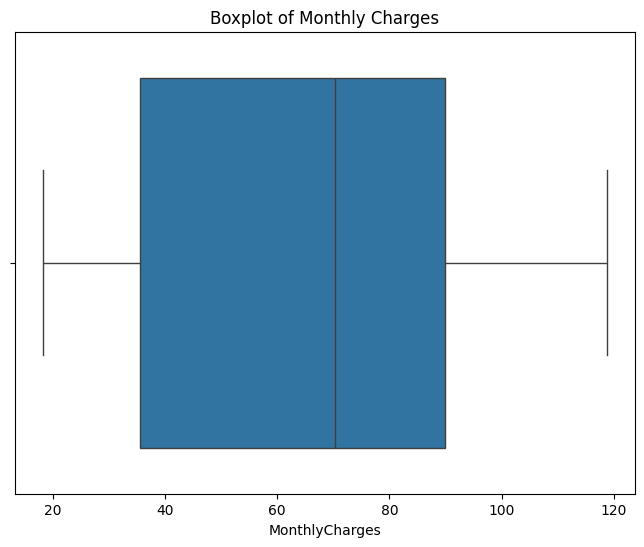

Number of rows before removing outliers: 7043
Number of rows after removing outliers: 7043


In [59]:
#identify outliers in monthly charges column using boxplot and remove them
import matplotlib.pyplot as plt # Import the matplotlib library
import seaborn as sns # Import the seaborn library


# Identify outliers in 'MonthlyCharges' using boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['MonthlyCharges'])
plt.title('Boxplot of Monthly Charges')
plt.show()

# Calculate quartiles and IQR
Q1 = df['MonthlyCharges'].quantile(0.25)
Q3 = df['MonthlyCharges'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify and remove outliers
df_no_outliers = df[(df['MonthlyCharges'] >= lower_bound) & (df['MonthlyCharges'] <= upper_bound)]

# Print the number of rows before and after removing outliers
print(f"Number of rows before removing outliers: {len(df)}")
print(f"Number of rows after removing outliers: {len(df_no_outliers)}")

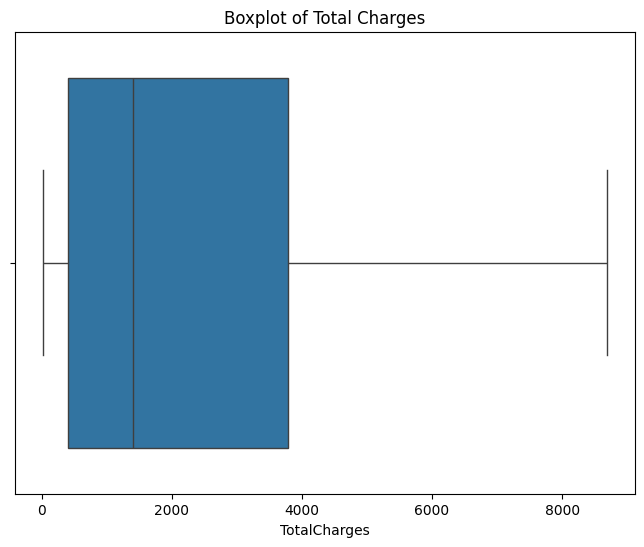

Number of rows before removing outliers: 7043
Number of rows after removing outliers: 7043


In [60]:
# Identify outliers in 'TotalCharges' using boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['TotalCharges'])
plt.title('Boxplot of Total Charges')
plt.show()

# Calculate quartiles and IQR
Q1 = df['TotalCharges'].quantile(0.25)
Q3 = df['TotalCharges'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify and remove outliers
df_no_outliers = df[(df['TotalCharges'] >= lower_bound) & (df['TotalCharges'] <= upper_bound)]

# Print the number of rows before and after removing outliers
print(f"Number of rows before removing outliers: {len(df)}")
print(f"Number of rows after removing outliers: {len(df_no_outliers)}")

In [61]:
categorical_cols = ['Dependents', 'Partner', 'SeniorCitizen', 'gender',
                    'StreamingMovies', 'StreamingTV', 'TechSupport','DeviceProtection',
                    'OnlineBackup', 'OnlineSecurity', 'InternetService', 'MultipleLines', 'Churn',
                    'PhoneService', 'Contract', 'PaperlessBilling', 'PaymentMethod']

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True, dtype=int)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tenure                                 7043 non-null   int64  
 1   MonthlyCharges                         7043 non-null   float64
 2   TotalCharges                           7043 non-null   float64
 3   Dependents_Yes                         7043 non-null   int64  
 4   Partner_Yes                            7043 non-null   int64  
 5   SeniorCitizen_1                        7043 non-null   int64  
 6   gender_Male                            7043 non-null   int64  
 7   StreamingMovies_No internet service    7043 non-null   int64  
 8   StreamingMovies_Yes                    7043 non-null   int64  
 9   StreamingTV_No internet service        7043 non-null   int64  
 10  StreamingTV_Yes                        7043 non-null   int64  
 11  Tech

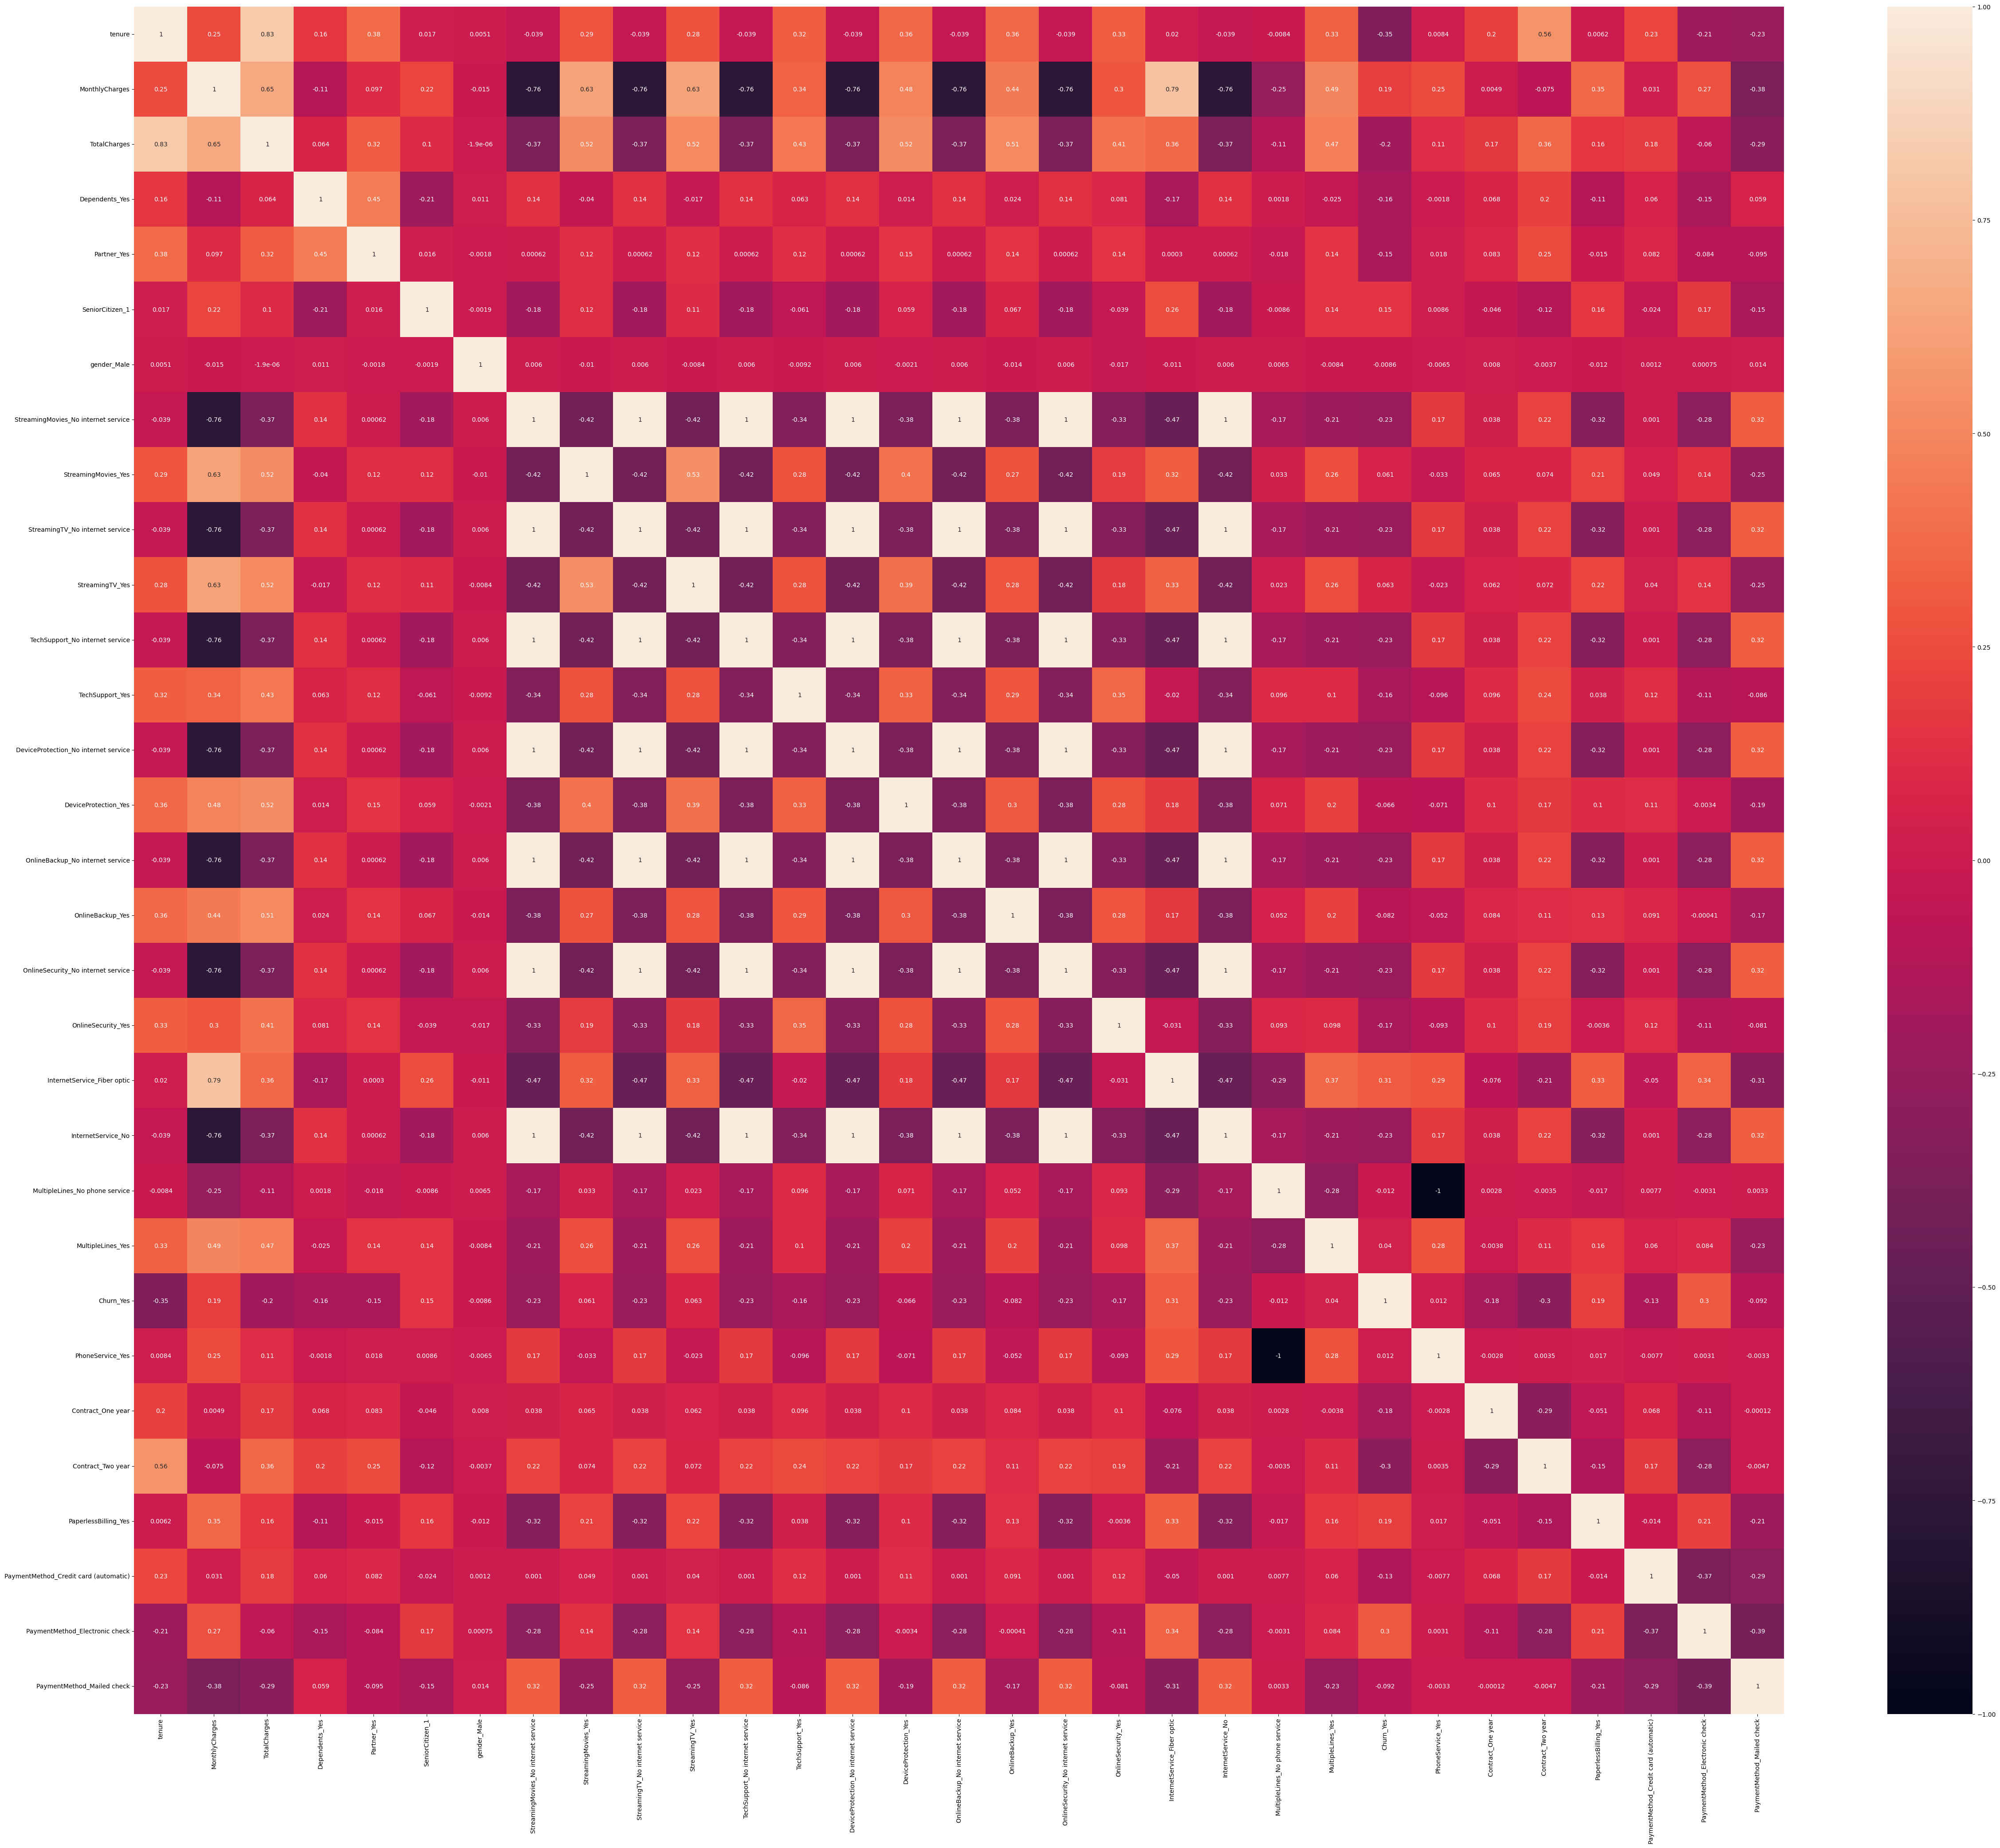

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize = (60,50))        # Size of the figure
sns.heatmap(df.corr(),annot = True)
plt.show()

In [64]:
# Split dataset into training and testing sets
X = df.drop(columns=['Churn_Yes'])
y = df['Churn_Yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [65]:
from sklearn.preprocessing import StandardScaler
# Standardize numerical features
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [66]:
#FIND CHURN RATE

# Calculate the churn rate
churn_rate = df['Churn_Yes'].value_counts(normalize=True) * 100
churn_rate

,proportion
Churn_Yes,
0,73.463013
1,26.536987


Model Building

In [67]:
import statsmodels.api as sm
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Churn_Yes   No. Observations:                 5634
Model:                            GLM   Df Residuals:                     5610
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2323.6
Date:                Mon, 10 Feb 2025   Deviance:                       4647.1
Time:                        04:15:15   Pearson chi2:                 6.32e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2827
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.6623      0.718     -3.707      0.000      -4.070      -1.255
tenure                                   -1.2917      0.167     -7.757      0.000      -1.618      -0.965
MonthlyCharges                           -2.5351      1.072     -2.366      0.018      -4.635      -0.435
TotalCharges                              0.5688      0.176      3.230      0.001       0.224       0.914
Dependents_Yes                           -0.2263      0.101     -2.247      0.025      -0.424      -0.029
Partner_Yes                               0.0209      0.087      0.241      0.810      -0.149       0.191
SeniorCitizen_1                           0.0539      0.035      1.540      0.124      -0.015       0.123
gender_Male                               0.0244      0.073      0.335      0.738      -0.118       0.167
StreamingMovies_No internet service      -0.4168      0.129     -3.228      0.001      -0.670      -0.164
StreamingMovies_Yes                       1.0599      0.367      2.890      0.004       0.341       1.779
StreamingTV_No internet service          -0.4168      0.129     -3.228      0.001      -0.670      -0.164
StreamingTV_Yes                           1.0576      0.366      2.890      0.004       0.340       1.775
TechSupport_No internet service          -0.4168      0.129     -3.228      0.001      -0.670      -0.164
TechSupport_Yes                           0.0458      0.203      0.226      0.821      -0.351       0.443
DeviceProtection_No internet service     -0.4168      0.129     -3.228      0.001      -0.670      -0.164
DeviceProtection_Yes                      0.3762      0.198      1.899      0.058      -0.012       0.764
OnlineBackup_No internet service         -0.4168      0.129     -3.228      0.001      -0.670      -0.164
OnlineBackup_Yes                          0.2370      0.195      1.213      0.225      -0.146       0.620
OnlineSecurity_No internet service       -0.4168      0.129     -3.228      0.001      -0.670      -0.164
OnlineSecurity_Yes                       -0.0073      0.201     -0.036      0.971      -0.401       0.386
InternetService_Fiber optic               2.8963      0.895      3.235      0.001       1.142       4.651
InternetService_No                       -0.4168      0.129     -3.228      0.001      -0.670      -0.164
MultipleLines_No phone service           -1.8844      0.717     -2.628      0.009      -3.290      -0.479
MultipleLines_Yes                         0.7043      0.199      3.545      0.000       0.315       1.094
PhoneService_Yes                         -0.7779      0.084     -9.231      0.000      -0.943      -0.613
Contract_One year                        -0.6992      0.121     -5.768      0.000      -0.937      -0.462
Contract_

Feature selection using RFE


In [68]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [69]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=logreg, n_features_to_select=20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [70]:
rfe.support_

array([ True,  True,  True,  True, False, False, False,  True,  True,
        True,  True,  True,  True,  True, False, False, False,  True,
        True,  True,  True, False,  True, False,  True,  True,  True,
       False,  True, False])

In [71]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('tenure', True, 1),
 ('MonthlyCharges', True, 1),
 ('TotalCharges', True, 1),
 ('Dependents_Yes', True, 1),
 ('Partner_Yes', False, 11),
 ('SeniorCitizen_1', False, 7),
 ('gender_Male', False, 10),
 ('StreamingMovies_No internet service', True, 1),
 ('StreamingMovies_Yes', True, 1),
 ('StreamingTV_No internet service', True, 1),
 ('StreamingTV_Yes', True, 1),
 ('TechSupport_No internet service', True, 1),
 ('TechSupport_Yes', True, 1),
 ('DeviceProtection_No internet service', True, 1),
 ('DeviceProtection_Yes', False, 8),
 ('OnlineBackup_No internet service', False, 4),
 ('OnlineBackup_Yes', False, 5),
 ('OnlineSecurity_No internet service', True, 1),
 ('OnlineSecurity_Yes', True, 1),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', True, 1),
 ('MultipleLines_No phone service', False, 3),
 ('MultipleLines_Yes', True, 1),
 ('PhoneService_Yes', False, 2),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaperlessBilling_Yes', True, 1),
 ('PaymentM

In [72]:
col = X_train.columns[rfe.support_]

In [73]:
X_train.columns[~rfe.support_]

Index(['Partner_Yes', 'SeniorCitizen_1', 'gender_Male', 'DeviceProtection_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'MultipleLines_No phone service', 'PhoneService_Yes',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check'],
      dtype='object')

In [74]:
#ASSESSING MODEL WITH STATSMODEL
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Churn_Yes   No. Observations:                 5634
Model:                            GLM   Df Residuals:                     5618
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2327.1
Date:                Mon, 10 Feb 2025   Deviance:                       4654.3
Time:                        04:15:16   Pearson chi2:                 6.35e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2818
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -2.2992      0.193    -11.897      0.000      -2.678      -1.920
tenure                                  -1.2971      0.163     -7.940      0.000      -1.617      -0.977
MonthlyCharges                          -0.8935      0.195     -4.591      0.000      -1.275      -0.512
TotalCharges                             0.5880      0.174      3.375      0.001       0.247       0.930
Dependents_Yes                          -0.2389      0.090     -2.646      0.008      -0.416      -0.062
StreamingMovies_No internet service     -0.2582      0.033     -7.820      0.000      -0.323      -0.194
StreamingMovies_Yes                      0.5258      0.108      4.865      0.000       0.314       0.738
StreamingTV_No internet service         -0.2582      0.033     -7.820      0.000      -0.323      -0.194
StreamingTV_Yes                          0.5228      0.109      4.799      0.000       0.309       0.736
TechSupport_No internet service         -0.2582      0.033     -7.820      0.000      -0.323      -0.194
TechSupport_Yes                         -0.2312      0.102     -2.267      0.023      -0.431      -0.031
DeviceProtection_No internet service    -0.2582      0.033     -7.820      0.000      -0.323      -0.194
OnlineSecurity_No internet service      -0.2582      0.033     -7.820      0.000      -0.323      -0.194
OnlineSecurity_Yes                      -0.2846      0.100     -2.842      0.004      -0.481      -0.088
InternetService_Fiber optic              1.5420      0.216      7.153      0.000       1.119       1.964
InternetService_No                      -0.2582      0.033     -7.820      0.000      -0.323      -0.194
MultipleLines_Yes                        0.4351      0.098      4.429      0.000       0.243       0.628
Contract_One year                       -0.7017      0.121     -5.813      0.000      -0.938      -0.465
Contract_Two year                       -1.3850      0.194     -7.124      0.000      -1.766      -1.004
PaperlessBilling_Yes                     0.3715      0.083      4.467      0.000       0.209       0.535
PaymentMethod_Electronic check           0.3740      0.078      4.814      0.000       0.222       0.526
========================================================================================================
"""

In [75]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

,0
3738,0.332295
3151,0.277702
4860,0.041928
3867,0.092975
3810,0.382225
2666,0.014945
2645,0.191991
189,0.119855
5767,0.014822
2257,0.047116


In [76]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred = y_train_pred * 100
y_train_pred[:10]

array([33.22946343, 27.77021826,  4.19279815,  9.29748278, 38.22247078,
        1.49453814, 19.19905806, 11.98552975,  1.48224945,  4.71159957])

Checking VIFs

In [77]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Features,VIF
10,DeviceProtection_No internet service,inf
8,TechSupport_No internet service,inf
14,InternetService_No,inf
4,StreamingMovies_No internet service,inf
11,OnlineSecurity_No internet service,inf
6,StreamingTV_No internet service,inf
1,MonthlyCharges,13.97
2,TotalCharges,10.37
0,tenure,6.94
13,InternetService_Fiber optic,5.79


In [78]:
# Assuming 'col' contains the columns selected by RFE
# Get a list of columns to drop
cols_to_drop = ['OnlineBackup_No internet service',
              'DeviceProtection_No internet service',
              'TechSupport_No internet service',
              'InternetService_No',
              'StreamingMovies_No internet service',
              'StreamingTV_No internet service']

# Only drop columns that are actually in 'col'
col = col.drop([c for c in cols_to_drop if c in col], errors='ignore')

In [79]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Churn_Yes   No. Observations:                 5634
Model:                            GLM   Df Residuals:                     5618
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2327.1
Date:                Mon, 10 Feb 2025   Deviance:                       4654.3
Time:                        04:15:17   Pearson chi2:                 6.35e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2818
Covariance Type:            nonrobust                                         
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [80]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,MonthlyCharges,13.97
2,TotalCharges,10.37
0,tenure,6.94
9,InternetService_Fiber optic,5.79
7,OnlineSecurity_No internet service,5.43
12,Contract_Two year,3.27
5,StreamingTV_Yes,2.95
4,StreamingMovies_Yes,2.87
13,PaperlessBilling_Yes,2.78
10,MultipleLines_Yes,2.39


In [81]:
col = col.drop('TotalCharges',1)

In [82]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Churn_Yes   No. Observations:                 5634
Model:                            GLM   Df Residuals:                     5619
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2333.1
Date:                Mon, 10 Feb 2025   Deviance:                       4666.1
Time:                        04:15:18   Pearson chi2:                 5.79e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2803
Covariance Type:            nonrobust                                         
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [83]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,MonthlyCharges,10.59
8,InternetService_Fiber optic,5.72
6,OnlineSecurity_No internet service,5.32
11,Contract_Two year,3.25
4,StreamingTV_Yes,2.95
3,StreamingMovies_Yes,2.86
12,PaperlessBilling_Yes,2.78
9,MultipleLines_Yes,2.39
0,tenure,2.22
5,TechSupport_Yes,1.96


Performance Evaluation

In [89]:
model = LogisticRegression()  # or your preferred model
model.fit(X_train[col], y_train)


from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
X_test_selected = X_test[col]
# Print evaluation results
print(f'Accuracy: {accuracy * 100:.2f}%')
y_pred = model.predict(X_test[col])

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation results
print(f'Accuracy: {accuracy * 100:.2f}%')
print('Confusion Matrix:\n', conf_matrix)
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1-Score: {f1 * 100:.2f}%')

Accuracy: 79.56%
Accuracy: 79.56%
Confusion Matrix:
 [[919 116]
 [172 202]]
Precision: 63.52%
Recall: 54.01%
F1-Score: 58.38%


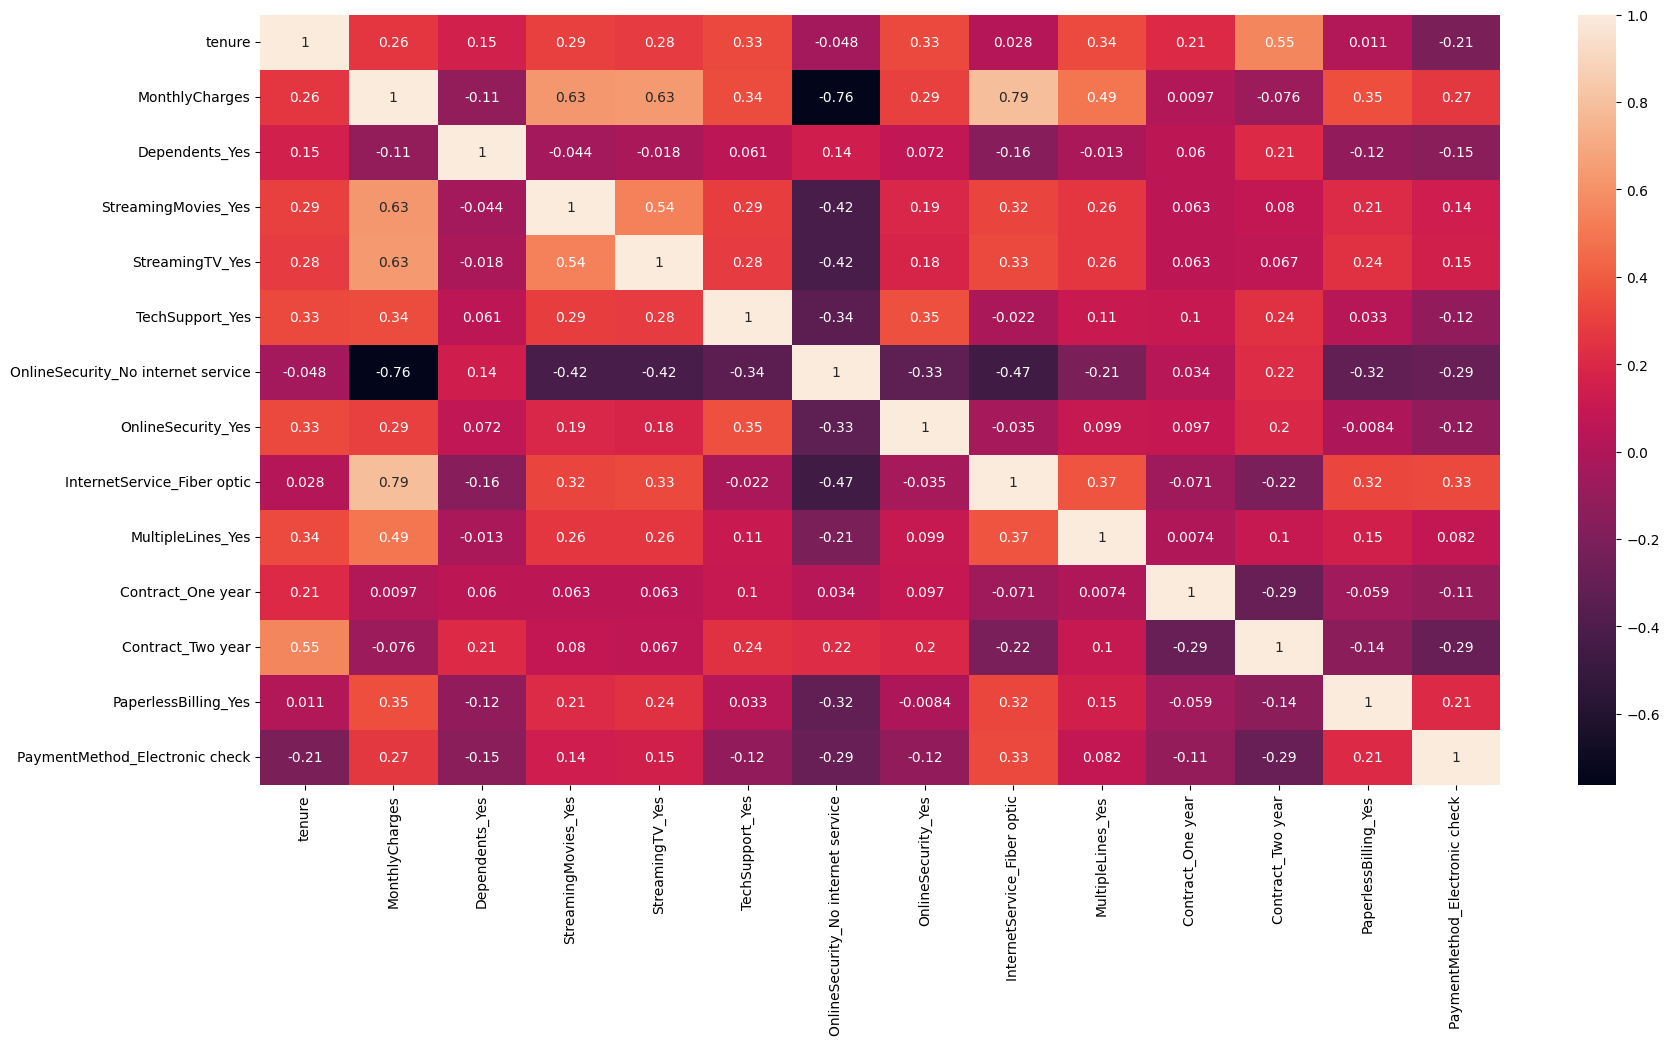

In [90]:
# Let's see the correlation matrix
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(X_train[col].corr(),annot = True)
plt.show()

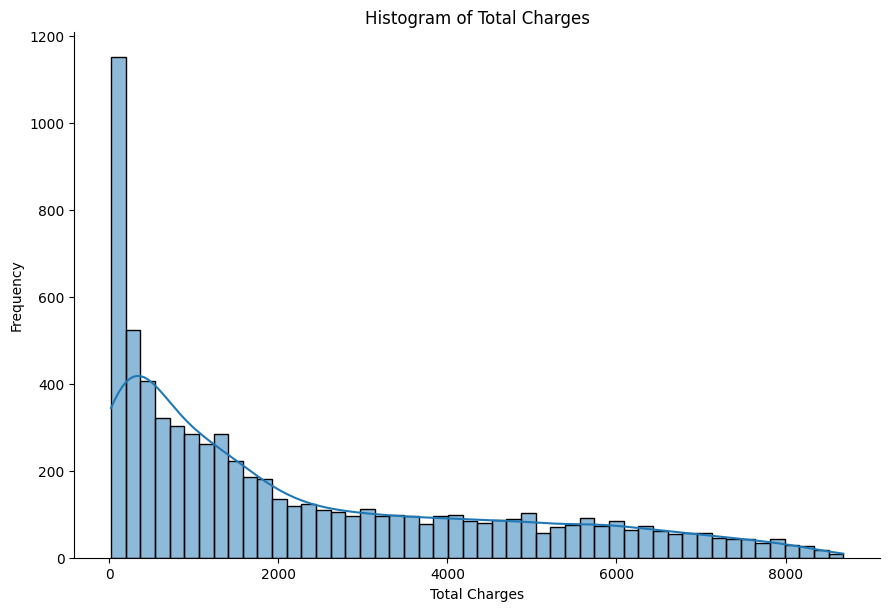

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.displot(df['TotalCharges'], bins=50, kde=True ,height=6 , aspect=1.5)
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.title('Histogram of Total Charges')
plt.show()
